In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

In [ ]:
result = './result_compare.csv'
result = pd.read_csv(result)
result.head()

In [7]:
result_model = result[:8].round(3)
result_model = result_model.rename(columns = {'inverse_ratio' : 'model_score'})
model_mat = result_model.as_matrix(columns = result_model.columns[2:-1])
model_score_array = np.sum(model_mat, axis = 1)
result_model.model_score = model_score_array

/Applications/anaconda3/envs/BMEN4000/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
result_model_ls = result_model[result_model['Scan type'] == 'LS']

In [112]:
c1 = sns.color_palette("BrBG", 7)[5]
plot_model = [model.replace('_', '-') for model in list(result_model_ls.Architecture.values)] 
plot_model_list = plot_model + [''] + plot_model

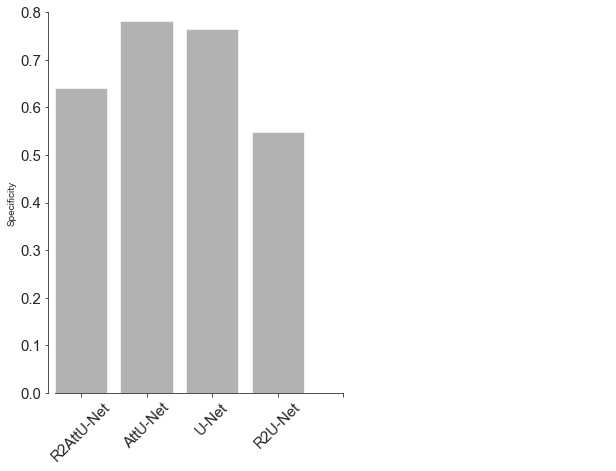

In [139]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.set_style('ticks')
idx = np.array(list(range(4)))
sns.barplot(idx, result_model_ls['Specificity'], color = 'grey', alpha = 0.6)
#sns.barplot(idx, result_model_ls['RR_DC'], color = 'w', edgecolor = 'grey')
ax.tick_params(axis = 'y', labelsize = 15);
#ax.legend(('Dice coefficient','Specificity'), loc = 'upper right', fontsize = 15)
ax.set_xticks((np.array(list(range(9)))))
ax.set_xticklabels(plot_model_list, fontsize = 15, rotation = 45)
ax.set_ylim([0,0.8])
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(False)
ax.spines['bottom'].set_smart_bounds(True)

In [18]:
result_ir = result[2:4].append( result[8:]).round(3)
result_ir

,Architecture,Scan type,Accuarcy,Sensitivity,Specificity,Precision,F1 Score,Jaccard Similariy,Dice Coefficient,RR_DC,inverse_ratio
2,AttU_Net,PP,0.76,0.42,0.768,0.410,0.364,0.296,0.383,0.568,NaN
3,AttU_Net,LS,0.77,0.34,0.782,0.339,0.305,0.249,0.331,0.543,NaN
8,AttU_Net,PP,0.81,0.43,0.829,0.485,0.442,0.378,0.436,0.441,0.10
9,AttU_Net,LS,0.85,0.46,0.830,0.487,0.452,0.381,0.452,0.476,0.10
10,AttU_Net,PP,0.77,0.39,0.780,0.435,0.352,0.275,0.371,0.437,0.25
11,AttU_Net,LS,0.76,0.35,0.768,0.341,0.296,0.235,0.316,0.391,0.25
12,AttU_Net,PP,0.76,0.47,0.766,0.407,0.369,0.294,0.385,0.503,0.50
13,AttU_Net,LS,0.76,0.27,0.786,0.348,0.267,0.209,0.293,0.437,0.50
14,AttU_Net,PP,0.77,0.38,0.782,0.484,0.359,0.275,0.377,0.538,0.75
15,AttU_Net,LS,0.75,0.37,0.762,0.350,0.302,0.235,0.321,0.501,0.75


In [19]:
LS_frame = result_ir[result_ir['Scan type'] == 'LS']
PP_frame = result_ir[result_ir['Scan type'] == 'PP']

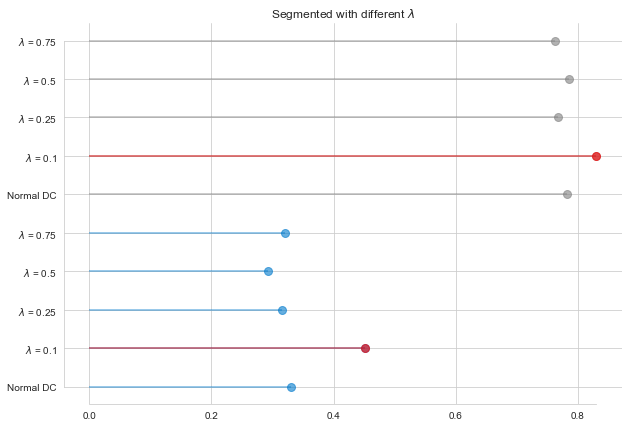

In [20]:
fig,ax = plt.subplots(figsize=(10, 7))


DC_range = np.array(list(range(5)))
SP_range = np.array(list(range(5))) + 5
ax.hlines(y = DC_range, xmin=0, xmax = LS_frame['Dice Coefficient'], color='#007ACC', alpha=0.4, linewidth=2)
p1 = ax.plot(LS_frame['Dice Coefficient'], DC_range, "o", markersize=8, color='#007ACC', alpha=0.6)

ax.hlines(y= SP_range, xmin=0, xmax = LS_frame['Specificity'], color='grey', alpha=0.4, linewidth=2)
p2 = ax.plot(LS_frame['Specificity'], SP_range, "o", markersize=8, color='grey', alpha=0.6)

ax.hlines(y= [1,6], xmin=0, xmax = [LS_frame['Dice Coefficient'].values[1], LS_frame['Specificity'].values[1]], color='r', alpha=0.4, linewidth=2)
p3 = ax.plot([LS_frame['Dice Coefficient'].values[1], LS_frame['Specificity'].values[1]], [1,6], "o", markersize=8, color='r', alpha=0.6)

ax.set_title('Segmented with different $\lambda$')
ax.set_yticks(list(range(10)))
ax.set_yticklabels(('Normal DC','$\lambda$ = 0.1', '$\lambda$ = 0.25', '$\lambda$ = 0.5', '$\lambda$ = 0.75', \
                   'Normal DC','$\lambda$ = 0.1', '$\lambda$ = 0.25', '$\lambda$ = 0.5', '$\lambda$ = 0.75') )
#ax.legend((p1[0],p2[0]),('Dice coefficient','Specificity'), loc = 'lower right', fontsize = 15)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
